# Project Title : University Student And Course Management

# Purpose

A Student Course Management System is a comprehensive digital platform designed to streamline and enhance the process of managing courses, curriculum, and academic information for educational institutions. It serves as a central hub where students, instructors, administrators, and other stakeholders can access and manage various aspects of the academic journey. This system leverages technology to automate administrative tasks and provide real-time information.

# Step 0 : Downloading necessary packages

In [1]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

# Step 1 : Importing necessary packages

In [2]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

# Step 2 : Establishing Connection (Database connectivity from python to mysql database)

In [16]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect (
    user = 'root', password = 'Rekha@777', host = 'localhost',
    database = 'universitystudentandcoursemanagement'
)

# Step 3 : Data View

In [4]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Accounts' table
cursor.execute('select * from student')
#After fetching data from the database we are storing it into Pandas DataFrame
student_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(student_data.head())

   student_id first_name last_name                   email date_of_birth  \
0           1       John       Doe    john.doe@example.com    2000-01-01   
1           2       Jane     Smith  jane.smith@example.com    2001-02-02   
2           3        Jim     Brown   jim.brown@example.com    2000-03-03   
3           4       Jake     White  jake.white@example.com    2001-04-04   
4           5       Jill     Green  jill.green@example.com    2000-05-05   

  enrollment_date  
0      2020-08-15  
1      2020-08-15  
2      2020-08-15  
3      2020-08-15  
4      2020-08-15  


In [5]:
# Query data from the 'Users' table
cursor.execute('SELECT * FROM courses')
# Fetch the data from the cursor and store it into a Pandas DataFrame
courses_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(courses_data.head())

   course_id                       course_name  department_id  credits  \
0          1  Introduction to Computer Science            101        3   
1          2                   Data Structures            101        3   
2          3                        Algorithms            101        3   
3          4                 Operating Systems            101        4   
4          5                  Database Systems            101        3   

                                         description  
0        An introductory course in computer science.  
1  Covers data structures such as arrays, linked ...  
2          Study of algorithms and their efficiency.  
3  Introduction to operating system concepts and ...  
4          Fundamentals of database systems and SQL.  


In [6]:
# Query data from the 'fraudalerts' table
cursor.execute('SELECT * FROM student_enrollment')
# Fetch the data from the cursor and store it into a Pandas DataFrame
student_enrollment_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(student_enrollment_data.head())

   enrollment_id  student_id  course_id enrollment_date
0              1           1          1      2023-01-01
1              2           1          2      2023-01-02
2              3           1          3      2023-01-03
3              4           2          1      2023-01-04
4              5           2          2      2023-01-05


In [7]:
# Query data from the 'transactionlogs' table
cursor.execute('SELECT * FROM departments')
# Fetch the data from the cursor and store it into a Pandas DataFrame
departments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(departments_data.head())

   department_id   department_name
0              1  Computer Science
1              2           Biology
2              3           Physics
3              4         Chemistry
4              5       Mathematics


In [8]:
# Query data from the 'transactions' table
cursor.execute('SELECT * FROM department_courses ')
# Fetch the data from the cursor and store it into a Pandas DataFrame
department_courses_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(department_courses_data.head())

   department_course_id  department_id  course_id
0                     1              1          1
1                     2              1          2
2                     3              1          3
3                     4              1          4
4                     5              1          5


# Step 4 : Data Cleaning

In [9]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("student \n----------")
print(student_data.isnull().sum())
print("\ncourses \n----------")
print(courses_data.isnull().sum())
print("\nstudent_enrollment\n----------")
print(student_enrollment_data.isnull().sum())
print("\ndepartments\n----------")
print(departments_data.isnull().sum())
print("\ndepartment_courses\n----------")
print(department_courses_data.isnull().sum())

student 
----------
student_id         0
first_name         0
last_name          0
email              0
date_of_birth      0
enrollment_date    0
dtype: int64

courses 
----------
course_id        0
course_name      0
department_id    0
credits          0
description      0
dtype: int64

student_enrollment
----------
enrollment_id      0
student_id         0
course_id          0
enrollment_date    0
dtype: int64

departments
----------
department_id      0
department_name    0
dtype: int64

department_courses
----------
department_course_id    0
department_id           0
course_id               0
dtype: int64


In [10]:
# Drop rows with any missing values (NaN) from the dataframe
student_data.dropna(inplace=True)
courses_data.dropna(inplace=True)
student_enrollment_data.dropna(inplace=True)
departments_data.dropna(inplace=True)
department_courses_data.dropna(inplace=True)

# Step 4 : Query Execution

In [34]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect (
    user = 'root', password = 'Rekha@777', host = 'localhost',
    database = 'universitystudentandcoursemanagement'
)
# Create a cursor object
cursor = connection.cursor()

# Execute SQL query to join data from multiple tables (restaurant, reservation, and orders)
cursor.execute('SELECT c.course_id, c.department_id, c.course_name, credits FROM courses c LEFT JOIN departments d ON c.department_id= d.department_id LEFT JOIN student_enrollment se ON se.course_id = c.course_id')

# Fetch the data and store it into a Pandas DataFrame
union_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
union_data = pd.DataFrame(union_data)
# Print the grouped and aggregated data
print(union_data)

     course_id  department_id                        course_name  credits
0            1            101   Introduction to Computer Science        3
1            1            101   Introduction to Computer Science        3
2            1            101   Introduction to Computer Science        3
3            1            101   Introduction to Computer Science        3
4            1            101   Introduction to Computer Science        3
..         ...            ...                                ...      ...
190         96            127                       Urban Design        3
191         97            127            Transportation Planning        3
192         98            127                  Land Use Planning        3
193         99            127             Environmental Planning        3
194        100            127  Housing and Community Development        3

[195 rows x 4 columns]


In [35]:
# Print the number of duplicate rows in the DataFrame
print(student_data.duplicated().sum())
print(courses_data.duplicated().sum())
print(student_enrollment_data.duplicated().sum())
print(departments_data.duplicated().sum())
print(department_courses_data.duplicated().sum())


0
0
0
0
0


In [36]:
# Count the number of events
count_of_transactions = courses_data['course_id'].value_counts()

# Print the number of transactions for each user
print(count_of_transactions)

course_id
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64


In [37]:
#arrabge the balance in ascending order
student_data.sort_values(by='student_id', ascending=True)

,student_id,first_name,last_name,email,date_of_birth,enrollment_date
0,1,John,Doe,john.doe@example.com,2000-01-01,2020-08-15
1,2,Jane,Smith,jane.smith@example.com,2001-02-02,2020-08-15
2,3,Jim,Brown,jim.brown@example.com,2000-03-03,2020-08-15
3,4,Jake,White,jake.white@example.com,2001-04-04,2020-08-15
4,5,Jill,Green,jill.green@example.com,2000-05-05,2020-08-15
...,...,...,...,...,...,...
95,96,Joanne,Blue,joanne.blue@example.com,2001-12-04,2020-08-15
96,97,Janet,Red,janet.red@example.com,2000-01-05,2020-08-15
97,98,James,Yellow,james.yellow@example.com,2001-02-06,2020-08-15
98,99,John,Pink,john.pink@example.com,2000-03-07,2020-08-15


In [38]:
#arrange the transaction date in ascending order
departments_data.sort_values(by='department_id', ascending=True)

,department_id,department_name
0,1,Computer Science
1,2,Biology
2,3,Physics
3,4,Chemistry
4,5,Mathematics
...,...,...
95,96,Structural Engineering
96,97,Construction Engineering
97,98,Telecommunications
98,99,Software Engineering


# Data Visualization

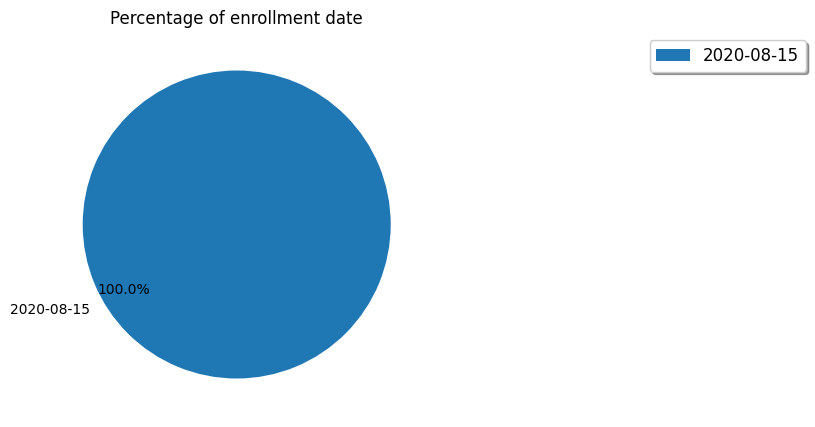

In [39]:
# Pie chart for percentage of fraudalerts by alert status
enrollment_date = student_data['enrollment_date'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,5))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(enrollment_date.values, labels= enrollment_date.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85) 
plt.title('Percentage of enrollment date')  # Set the title of the chart
plt.legend(loc='upper right', fontsize=12, shadow=True,bbox_to_anchor=(2,1))
# Display the chart
plt.show() 

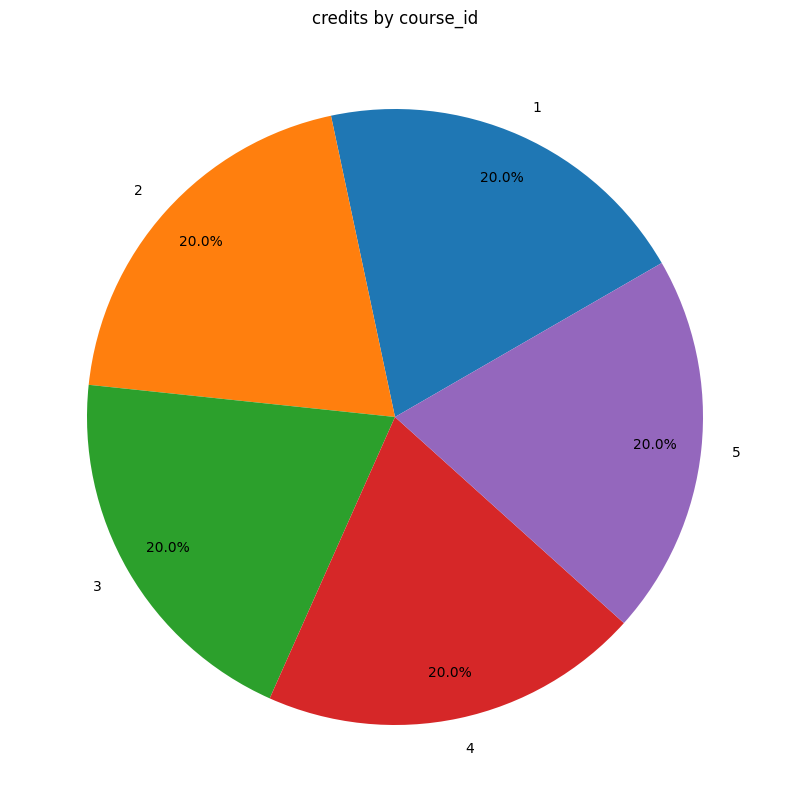

In [43]:
# Pie chart for percentage of payments by paymentmethods
credits = student_enrollment_data['course_id'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,10))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(credits.values, labels=credits.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85) 
plt.title('credits by course_id')  # Set the title of the chart
# Display the chart
plt.show()

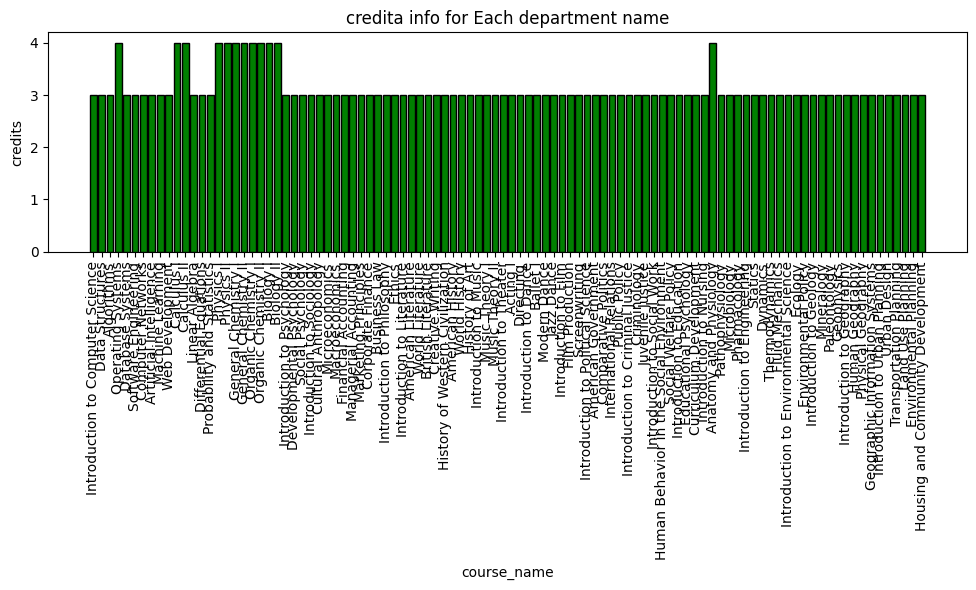

In [44]:
# create an line chart for accounts data based on balance
plt.figure(figsize=(10, 6))
plt.bar(courses_data['course_name'], courses_data['credits'], color='green',edgecolor='black',width=0.8)
plt.xlabel('course_name')
plt.ylabel('credits')
plt.title('credita info for Each department name')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

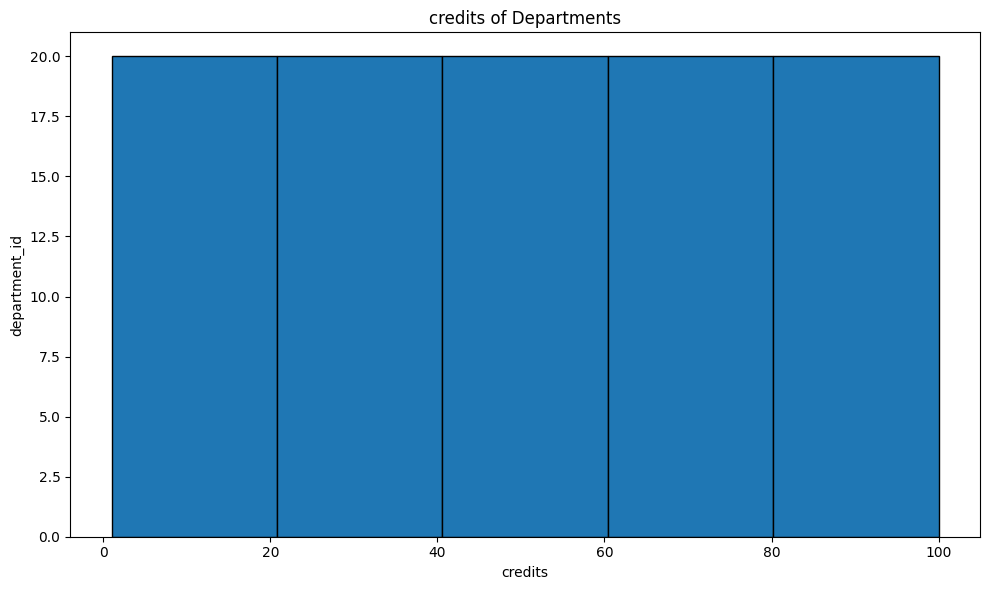

In [61]:
# Create a histogram for the transaction amount column
plt.figure(figsize=(10, 6))
plt.hist(courses_data['course_id'], bins=5, edgecolor='black')
plt.xlabel('credits')
plt.ylabel('department_id')
plt.title('credits of Departments')
plt.tight_layout()

# Show the plot
plt.show()

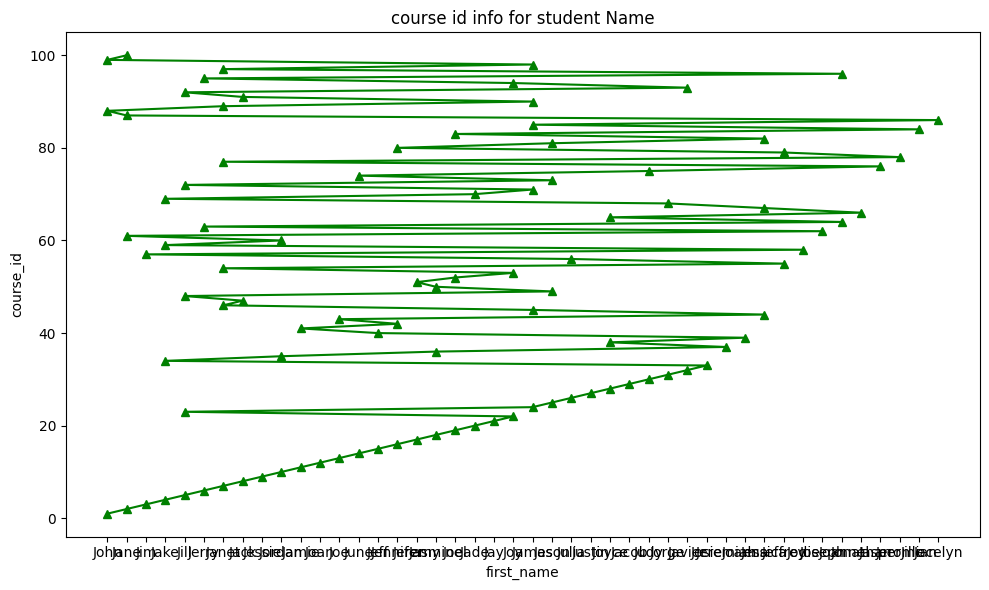

In [62]:
# create an line chart for customerses data based on balance
plt.figure(figsize=(10, 6))
plt.plot(student_data['first_name'], courses_data['course_id'], marker='^', linestyle='-', color='green')
plt.xlabel('first_name')
plt.ylabel('course_id')
plt.title('course id info for student Name')
plt.tight_layout()

# Show the plot
plt.show()


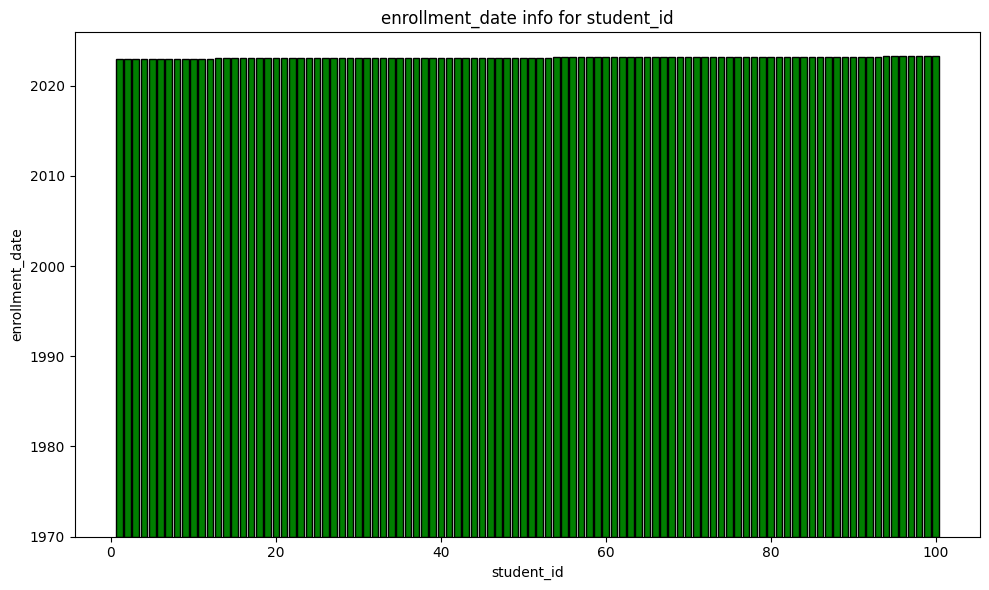

In [63]:
# create an line chart for accounts data based on balance
plt.figure(figsize=(10, 6))
plt.bar(student_data['student_id'], student_enrollment_data['enrollment_date'], color='green',edgecolor='black',width=0.8)
plt.xlabel('student_id')
plt.ylabel('enrollment_date')
plt.title('enrollment_date info for student_id')
plt.tight_layout()

# Show the plot
plt.show()

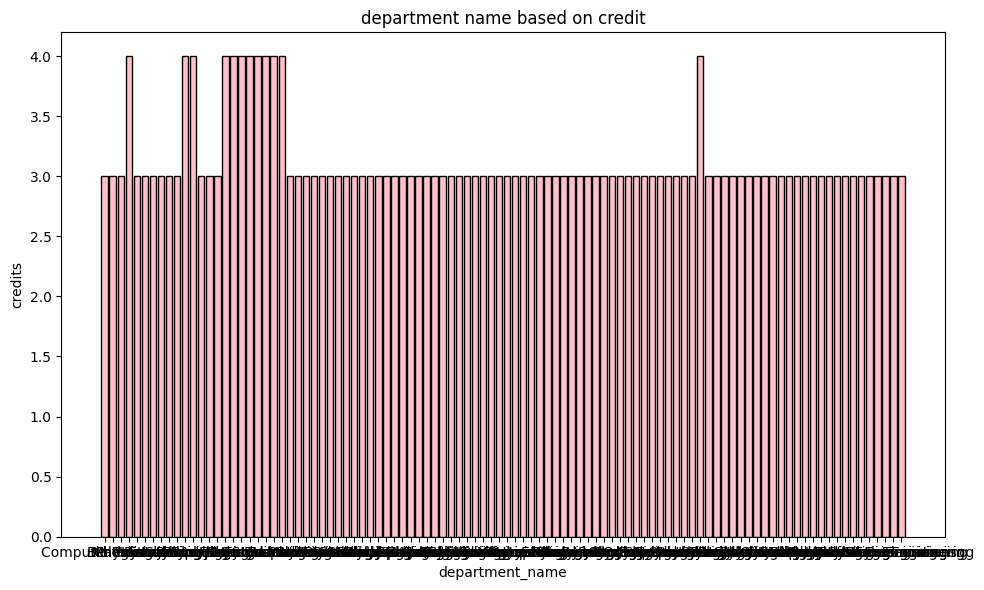

In [65]:
# create an line chart for accounts data based on balance
plt.figure(figsize=(10, 6))
plt.bar(departments_data['department_name'], courses_data['credits'], color='pink',edgecolor='black',width=0.8)
plt.xlabel('department_name')
plt.ylabel('credits')
plt.title('department name based on credit')
plt.tight_layout()

# Show the plot
plt.show()

# Conclusion

The system provides a centralized database that consolidates all the relevant information related to students, faculty,courses, and departments.
This ensures data consistency, reduces redundancy, and facilitates easy access to information. 
By automating many of the manual administrative tasks, the system significantly improves the efficiency of university operations. 
Tasks such as course registration, grade entry, and timetable scheduling are streamlined, saving time and reducing errors. 
The system includes robust reporting and analytics capabilities, allowing administrators to generate detailed reports on student performance,
course enrollments, faculty workloads, and more.
This data-driven approach supports informed decision-making and strategic planning. 
The project incorporates stringent security measures to protect sensitive data and ensure compliance with privacy regulations.
User authentication, role-based access control, and data encryption are some of the key security features implemented.
